In [1]:
from jax.random import PRNGKey, split

import hyperiax

In [2]:
key = PRNGKey(0)

# Creating the Tree

First, we initialize the tree. 
This can be done by mutliple methods

``hyperiax.tree.builders.symmetric_tree(h,branching)``

builds a symmetric tree, with h depth, and branching
note the tree does not include a length of the branches

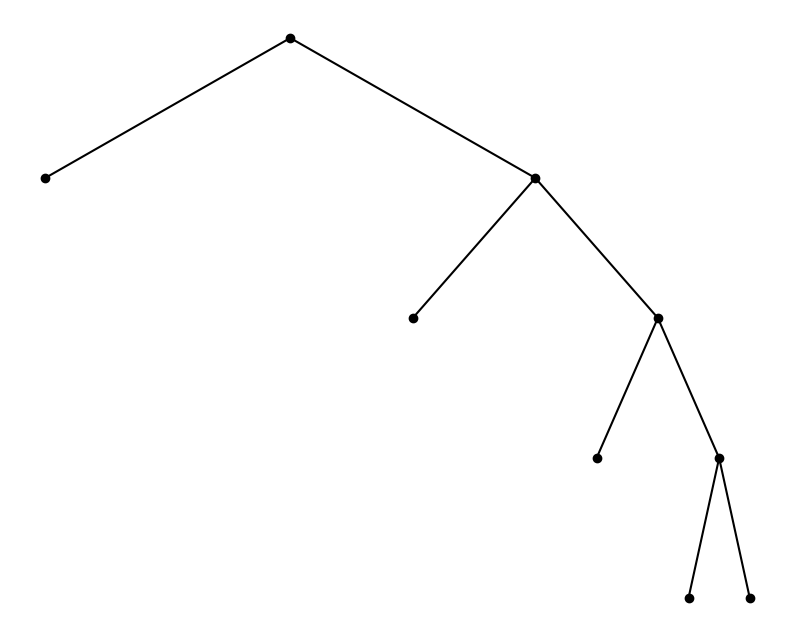

In [3]:
tree = hyperiax.tree.builders.symmetric_tree(4,2)

tree = hyperiax.tree.builders.asymmetric_tree(4)
tree.plot_tree()


# Add branch length 
We then iterate over all of the nodes in the tree breadth first using `iter_bfs()`, and for each node, we set the data to be the normal sample (`node.data`) and an edge with an value are assigned

In [4]:
# Add branch length

for node in tree.iter_bfs():
    node.data["edge_length"] =  1


# Add data to entire tree

First, we initialize the tree. 

``jaxtrees.tree.initializers.initialize_noise`` Will place a `shape` shaped sample from the unit normal $\mathcal{N}(0,1)$ in `node.data`. 

Note that node.data, now have to lists (1) the length and (2), our sampled data

In [5]:
subkey, key = split(key)
noise_tree = hyperiax.tree.initializers.initialize_noise(tree, key, (2,))

In [6]:
noise_tree.root.children

[TreeNode({'edge_length': 1, 'noise': Array([-1.2105676, -0.3317731], dtype=float32)}) with no children,
 TreeNode({'edge_length': 1, 'noise': Array([-0.32677713, -0.31295425], dtype=float32)}) with 2 children]

## Add leaf names

In [7]:
k = 0
for leaf in noise_tree.iter_leaves():
    leaf.name = str(k)
    k += 1
    print(leaf.name,leaf.data["edge_length"])


0 1
1 1
2 1
3 1
4 1


## Save the tree structure for future use 
For now, there is a problem with the new defination of edgelength, tba


In [8]:
tree_str  = noise_tree.to_newick()
print(tree_str)

(0:1,(1:1,(2:1,(3:1,4:1):1):1):1):1;


## Load tree from newick format 

tbd, with including the length 


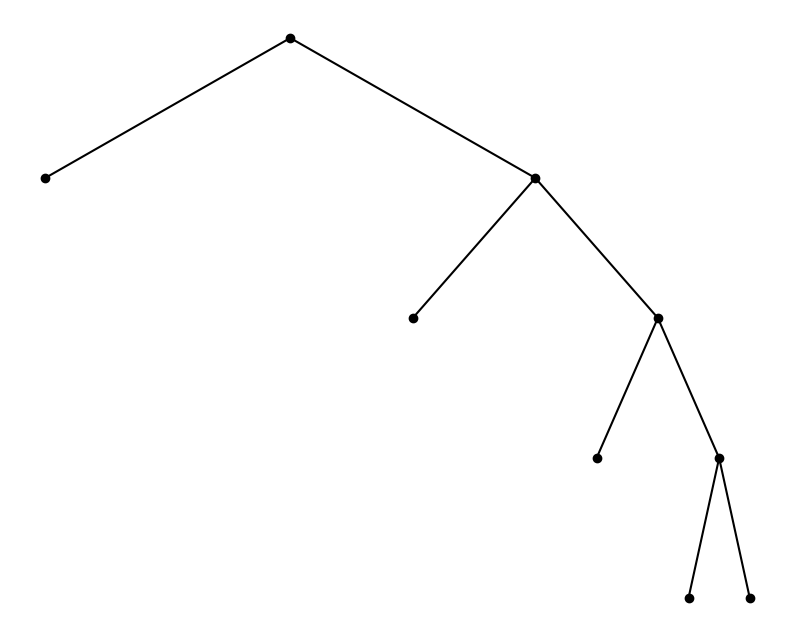

In [9]:
jax_tree = hyperiax.tree.builders.tree_from_newick(tree_str)
jax_tree.plot_tree()